In [1]:
 #import Libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\User\AppData\Local\Temp\ipykernel_20340\1236691826.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


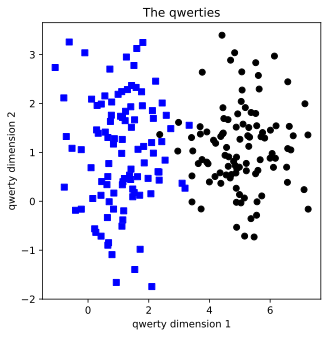

In [14]:
#create data 
nPerClust = 100
blur = 1

A=[1,1]
B=[5,1]

#generate data
a=[A[0]+np.random.randn(nPerClust)*blur,A[1]+np.random.randn(nPerClust)*blur ]
b=[B[0]+np.random.randn(nPerClust)*blur,B[1]+np.random.randn(nPerClust)*blur ]

#true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

#concatenate into a matrix
data_np = np.hstack((a,b)).T

#Convert to a pytorch tensor 
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [24]:
#build the model
ANNclassify = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
)

ANNclassify

     

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [25]:
#other model features 
learningRate = 0.01

#loss function
lossfun = nn.BCELoss()

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

In [26]:
#train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    #forward pass
    yHat = ANNclassify(data)

    #compute loss
    loss = lossfun(yHat,labels)
    losses[epochi]=loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

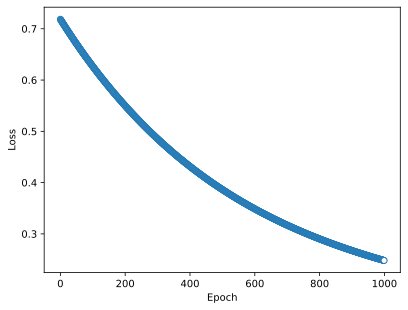

In [27]:
# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [28]:
#compute the predictions

#manually compute losses
#final forward pass
predictions = ANNclassify(data)

predlabels = predictions>.5

#find errors
misclassified = np.where(predlabels != labels)[0]

#total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 95%


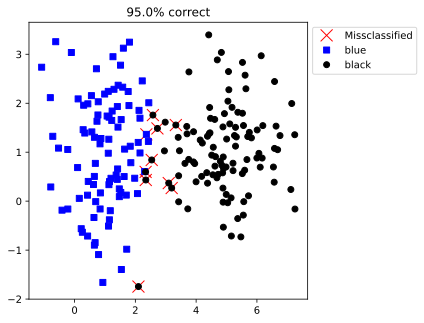

In [29]:
#plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0],data[misclassified,1],'rx',markersize=12,)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0],data[np.where(predlabels)[0],1],'ko')

plt.legend(['Missclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()



In [31]:
predlabels = predictions>.5
predlabels

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False